In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv('mouse_drug_data.csv')
clinic_data = pd.read_csv('clinicaltrial_data.csv')

# Combine the data into a single dataset
merged_df = clinic_data.merge(mouse_data, on = 'Mouse ID')

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
avg_tumor = merged_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']
avg_df = pd.DataFrame(avg_tumor)
avg_df.reset_index().head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
tumor_std_error = merged_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']
stderr_df = pd.DataFrame(tumor_std_error)
# Preview DataFrame
stderr_df.reset_index().head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
avg_df = avg_df.reset_index()
avg_tumor_vol = avg_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
avg_tumor_vol.reset_index()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [6]:
stderr_df = stderr_df.reset_index()
tumor_sem = stderr_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
tumor_sem.reset_index().head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


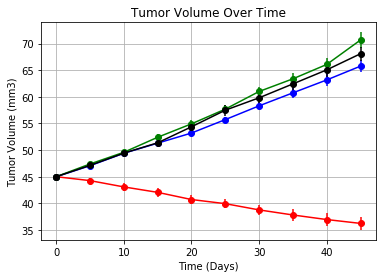

In [7]:
# Generate the Plot (with Error Bars)
plt.title("Tumor Volume Over Time")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='both')

# Save the Figure
plt.errorbar(avg_tumor_vol.index, avg_tumor_vol['Capomulin'], yerr=tumor_sem['Capomulin'], color="r", marker="o", linestyle="solid")
plt.errorbar(avg_tumor_vol.index, avg_tumor_vol['Infubinol'], yerr=tumor_sem['Infubinol'], color="b", marker="o", linestyle="solid")
plt.errorbar(avg_tumor_vol.index, avg_tumor_vol['Ketapril'], yerr=tumor_sem['Ketapril'], color="g", marker="o", linestyle="solid")
plt.errorbar(avg_tumor_vol.index, avg_tumor_vol['Placebo'], yerr=tumor_sem['Placebo'], color="k", marker="o", linestyle="solid")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic = merged_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
metastatic_df = pd.DataFrame(metastatic)
# Preview DataFrame
metastatic_df.reset_index().head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_stderr = merged_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']
# Convert to DataFrame
met_err_df = pd.DataFrame(met_stderr)
# Preview DataFrame
met_err_df.reset_index().head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_df = metastatic_df.reset_index()
met_sites = metastatic_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']
# Preview that Reformatting worked
met_sites.reset_index().head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
# Minor Data Munging to Re-Format the Data Frames
met_stderr = met_stderr.reset_index()
met_err_df = met_stderr.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']
# Preview that Reformatting worked
met_err_df.reset_index().head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


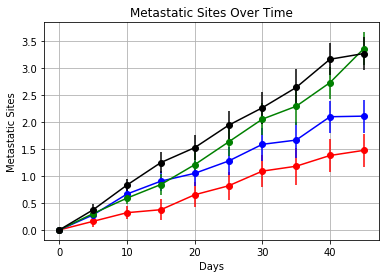

In [12]:
# Generate the Plot (with Error Bars)
plt.title("Metastatic Sites Over Time")
plt.ylabel("Metastatic Sites")
plt.xlabel("Days")
plt.grid(axis='both')

# Save the Figure
plt.errorbar(met_sites.index, met_sites['Capomulin'], yerr=met_err_df['Placebo'], color='r', marker='o',linestyle='solid')
plt.errorbar(met_sites.index, met_sites['Infubinol'], yerr=met_err_df['Placebo'], color='b', marker='o',linestyle='solid')
plt.errorbar(met_sites.index, met_sites['Ketapril'], yerr=met_err_df['Placebo'], color='g', marker='o',linestyle='solid')
plt.errorbar(met_sites.index, met_sites['Placebo'], yerr=met_err_df['Placebo'], color='k', marker='o',linestyle='solid')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = merged_df.groupby(['Drug','Timepoint']).count()['Mouse ID']
# Convert to DataFrame
survival_df = pd.DataFrame(mouse_count)
# Preview DataFrame
survival_df.reset_index().head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
survival_df = survival_df.reset_index()
surviving_mice = survival_df.pivot(index='Timepoint', columns='Drug')['Mouse ID']
# Preview the Data Frame
surviving_mice.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


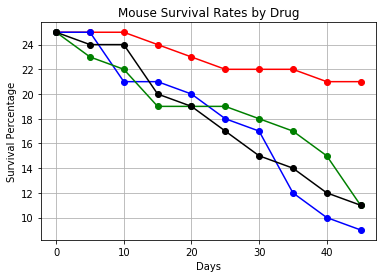

In [15]:
# Generate the Plot (Accounting for percentages)
plt.title('Mouse Survival Rates by Drug')
plt.ylabel('Survival Percentage')
plt.xlabel('Days')
plt.grid(axis='both')

# Save the Figure
plt.plot(surviving_mice['Capomulin'], color='r', marker='o', linestyle='solid')
plt.plot(surviving_mice['Infubinol'], color='b', marker='o', linestyle='solid')
plt.plot(surviving_mice['Ketapril'], color='g', marker='o', linestyle='solid')
plt.plot(surviving_mice['Placebo'], color='k', marker='o', linestyle='solid')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
tumor_diff = (avg_tumor_vol.loc[45, :] - avg_tumor_vol.loc[0, :])/avg_tumor_vol.loc[0, :]
change_percent = tumor_diff * 100
# Display the data to confirm
change_percent

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

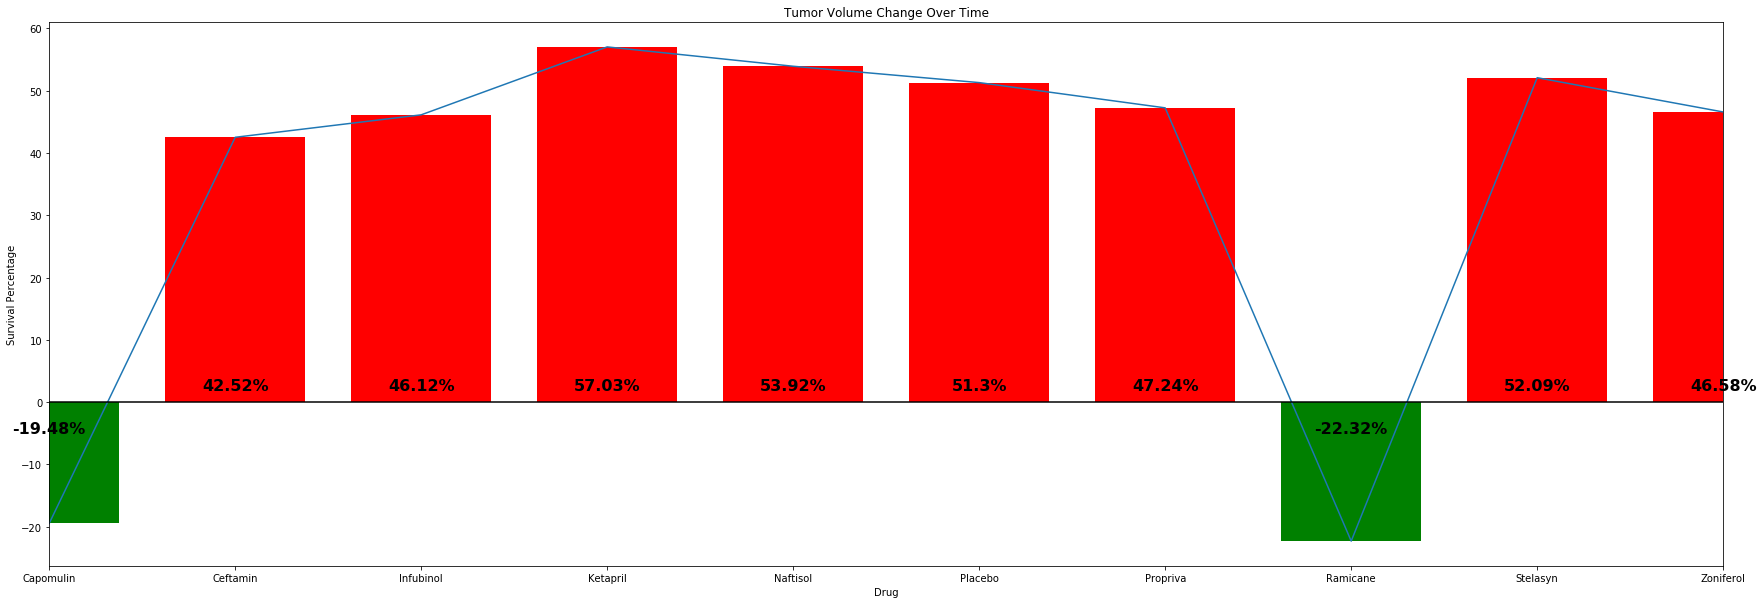

In [36]:
#This data is just for the fun of it. The homework only asked that we analyze the 4 drugs but this is just a copy/paste job
# to see if any other drug was successful
change_percent.plot(figsize=(30,10))
plt.title('Tumor Volume Change Over Time')
plt.ylabel('Survival Percentage')
plt.axhline(y=0, color = 'black')

x_labels = change_percent.index

plt.xticks(np.arange(10), x_labels)

plt.bar(np.arange(10), change_percent, 
        color = ['red' if change_percent[x] > 0 else 'green' for x in np.arange(10)],
        width=0.75
        
       )

count = 0

for x in change_percent:
    if x < 0:
        y_value = -5
    else:
        y_value = 2
    plt.text(count, y_value, str(round(x, 2)) + '%', ha = 'center', color = 'black', weight = 'bold', fontsize='16')
    count += 1

plt.show()

In [17]:
isolated_list = change_percent.get(['Capomulin','Infubinol','Ketapril','Placebo'])
isolated_list

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

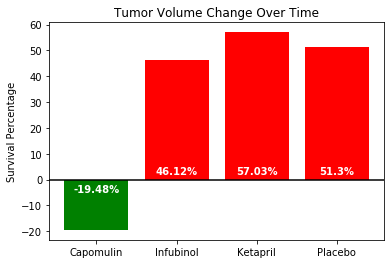

In [37]:
plt.title('Tumor Volume Change Over Time')
plt.ylabel('Survival Percentage')
plt.axhline(y=0, color = 'black')

x_labels = isolated_list.index

plt.xticks(np.arange(4), x_labels)

plt.bar(np.arange(4), isolated_list, 
        color = ['red' if isolated_list[x] > 0 else 'green' for x in np.arange(4)]
        )

count = 0

for x in isolated_list:
    if x < 0:
        y_value = -5
    else:
        y_value = 2
    plt.text(count, y_value, str(round(x, 2)) + '%', ha = 'center', color = 'white', weight = 'bold')
    count += 1

plt.show()

![Metastatic Spread During Treatment](../Images/change.png)